# Objective 1

### Install and import required packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import LSTM
import tools
from sklearn.metrics import mean_squared_error

## Data loading

In [3]:
# Loading data
train = np.load('/content/drive/MyDrive/Dataset/Ferguson_fire_train.npy')
test = np.load('/content/drive/MyDrive/Dataset/Ferguson_fire_test.npy')
background = np.load('/content/drive/MyDrive/Dataset/Ferguson_fire_background.npy')
observation = np.load('/content/drive/MyDrive/Dataset/Ferguson_fire_obs.npy')

# Step 1: Train Convolutional LSTM model

In [4]:
input = (2, 256, 256, 1)  # （time steps，width，height，channel）
# create random input
input_data = np.random.rand(79, *input)  # batch size is 24

# create model
model = LSTM.ConvLSTMModel(input)

# predict output
output = model.predict(input_data)

print(output.shape)

3/3 [==============================] - 7s 48ms/step
(79, 256, 256, 1)


In [4]:
# Data preprocessing
x_train, y_train = tools.generate_lstm_input(train, 125)
x_test, y_test = tools.generate_lstm_input(test, 50)

In [6]:
# Train the model
model.train(x_train, y_train, x_test, y_test, epochs=30)

Epoch 1/30
309/309 - 22s - loss: 0.0244 - val_loss: 0.0122 - 22s/epoch - 71ms/step
Epoch 2/30
309/309 - 15s - loss: 0.0126 - val_loss: 0.0117 - 15s/epoch - 48ms/step
Epoch 3/30
309/309 - 15s - loss: 0.0123 - val_loss: 0.0114 - 15s/epoch - 48ms/step
Epoch 4/30
309/309 - 15s - loss: 0.0119 - val_loss: 0.0111 - 15s/epoch - 49ms/step
Epoch 5/30
309/309 - 15s - loss: 0.0117 - val_loss: 0.0109 - 15s/epoch - 49ms/step
Epoch 6/30
309/309 - 15s - loss: 0.0115 - val_loss: 0.0108 - 15s/epoch - 50ms/step
Epoch 7/30
309/309 - 15s - loss: 0.0114 - val_loss: 0.0107 - 15s/epoch - 49ms/step
Epoch 8/30
309/309 - 15s - loss: 0.0114 - val_loss: 0.0107 - 15s/epoch - 49ms/step
Epoch 9/30
309/309 - 15s - loss: 0.0113 - val_loss: 0.0106 - 15s/epoch - 49ms/step
Epoch 10/30
309/309 - 15s - loss: 0.0113 - val_loss: 0.0106 - 15s/epoch - 49ms/step
Epoch 11/30
309/309 - 15s - loss: 0.0112 - val_loss: 0.0106 - 15s/epoch - 49ms/step
Epoch 12/30
309/309 - 15s - loss: 0.0112 - val_loss: 0.0106 - 15s/epoch - 49ms/step
E

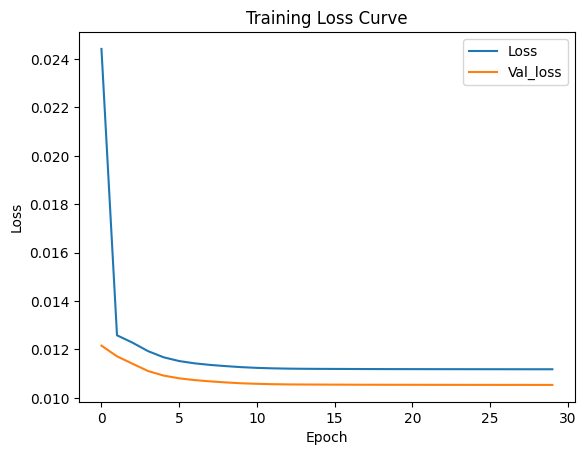

In [8]:
# Plot the loss function
model.plot_loss()

In [6]:
# Calculate MSE for test set
x_test_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test.flatten(), x_test_pred.flatten())
print(f'MSE: {mse_test}')

124/124 [==============================] - 9s 12ms/step
MSE: 0.010426324792206287


# Step 2: Prediction for the background data

In [5]:
# Load model
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/con_lstm_sigmoid_2ts.h5')

In [7]:
# Reshape the background data for prediction
back_input, back_ori = tools.reshape_background(background)

In [8]:
# Make predictions
background_pre = model.predict(back_input)
background_pre = np.reshape(background_pre, (3, 256, 256))

1/1 [==============================] - 0s 91ms/step


# Step 3: Calculate MSE and Plot the diagrams

In [9]:
# Calculate the mean squared error
mse_back = mean_squared_error(background[2:5].flatten(), background_pre.flatten())
mse_obs = mean_squared_error(observation[2:5].flatten(), background_pre.flatten())
mse_orig = mean_squared_error(observation[2:5].flatten(), background[2:5].flatten())

# Print the mean squared error
print('MSE on background data after and before:', mse_back)
print('MSE on original background and observation data:', mse_orig)
print('MSE on predicted background and observation data:', mse_obs)

MSE on background data after and before: 0.02372321
MSE on original background and observation data: 0.09439595540364583
MSE on predicted background and observation data: 0.0765330352128238


## Plot the diagrams

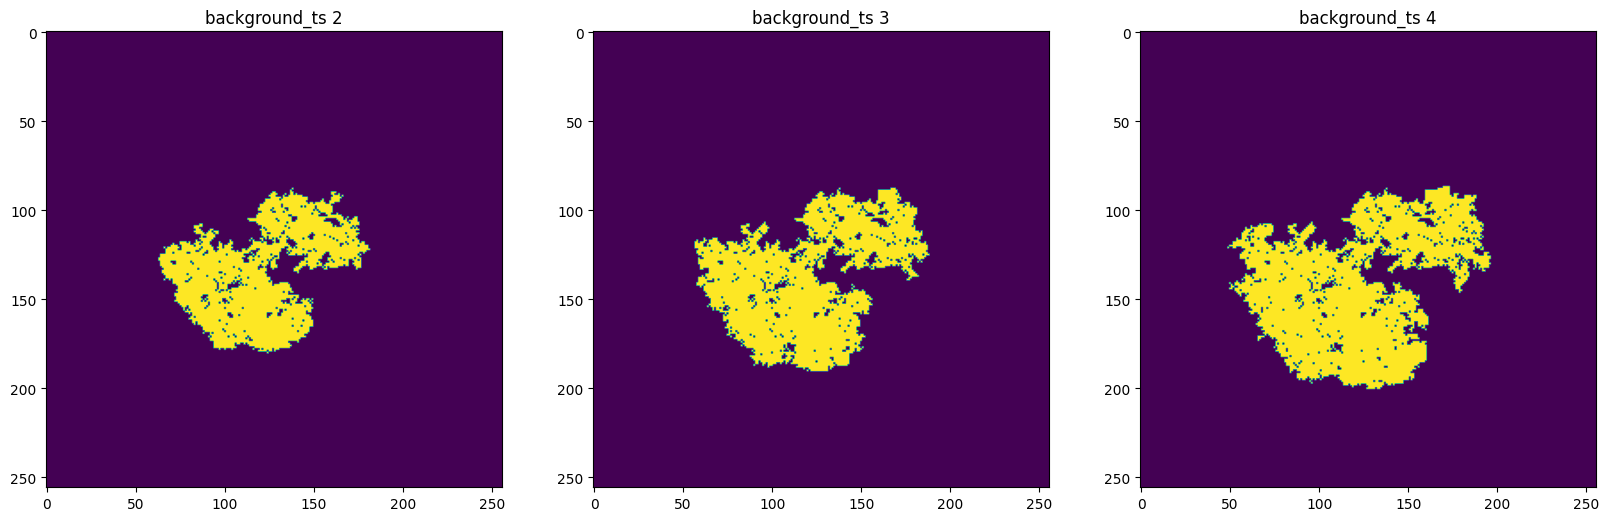

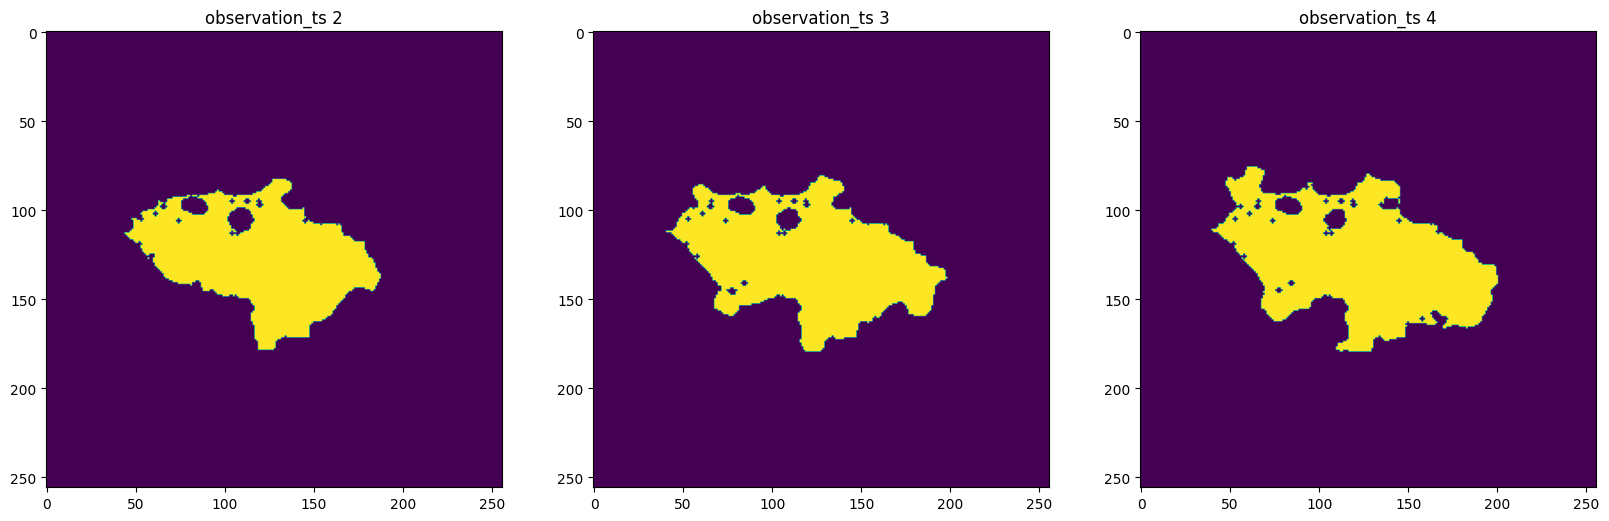

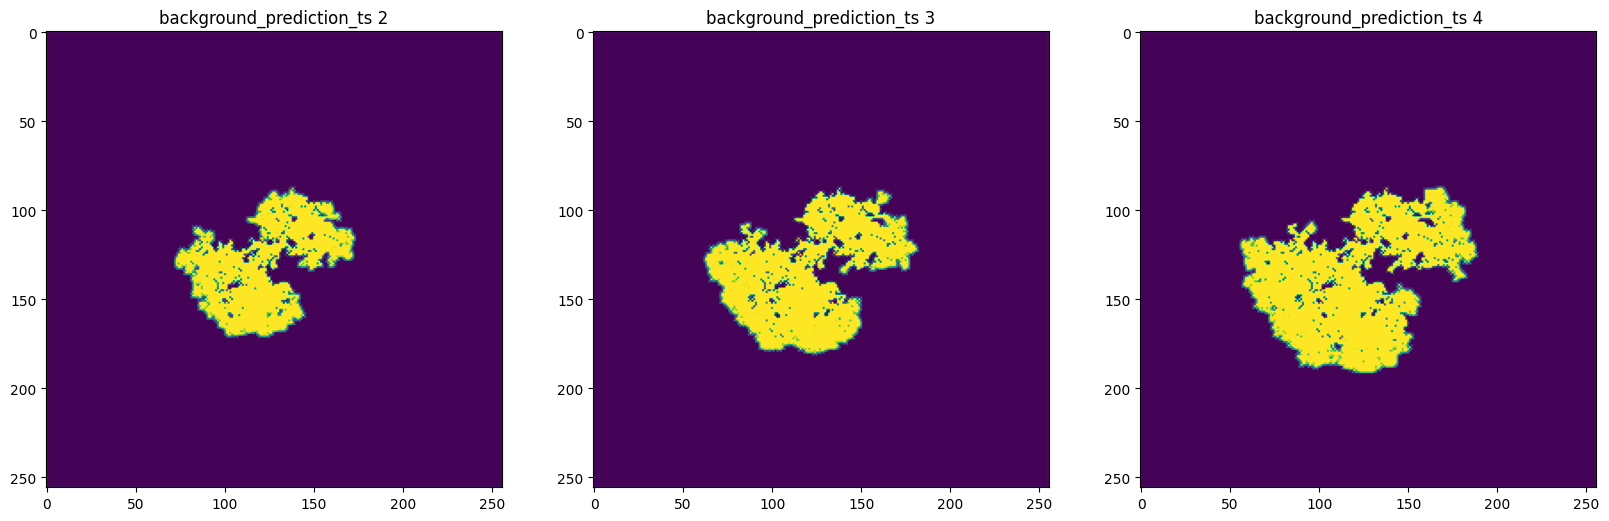

In [11]:
ts = [0, 1, 2, 3, 4]
tools.plot_data(background, ts[2:], [f'background_ts {i}' for i in range(2,5)])
tools.plot_data(observation, ts[2:], [f'observation_ts {i}' for i in range(2,5)])
tools.plot_data(background_pre, ts[:3],[f'background_prediction_ts {i+2}' for i in range(3)])

In [12]:
# save the result for Data Assimilation
path = 'drive/MyDrive/'
np.save(path+'lstm_results.npy',background_pre)